In [29]:
import pandas as pd
from prophet import Prophet
import numpy as np

import matplotlib.pyplot as plt

import src.data_processing.load_data
import time
import os


plt.style.use('seaborn-poster')


import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 200)


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
sleep, time0 = src.data_processing.load_data.get_sleep('12/06/2021', '../../data/')

In [52]:
timeseries = (sleep.sleep - sleep.trend)[-10 * 24 * 6 - 12 * 6 :]

In [ ]:
def forecast(sleep, time0, forecast_period):
    timeseries = sleep.sleep - sleep.trend

    #define and fit the model
    model = Prophet()
    model.fit(timeseries)

    #generate prediction
    future = model.make_future_dataframe(periods = forecast_period)
    forecast = model.predict(future)

<AxesSubplot:>

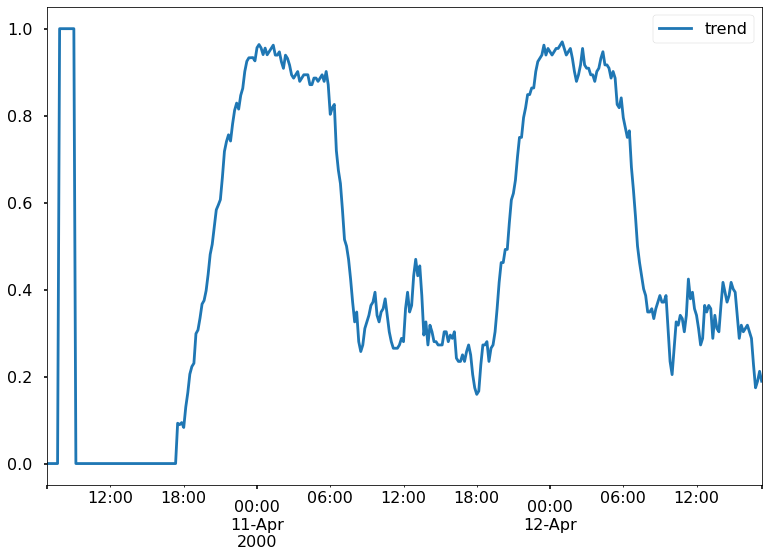

In [72]:
(pd.DataFrame(answer, columns=['trend']) + addtrend).plot()

In [3]:
data = pd.read_csv('../../data/NYU_data_processed/NYU_sleep_df.csv', index_col = 0)

In [4]:
timeseries = pd.date_range(start = '1/1/2020', end = '31/12/2020', freq = '10min')[:-1]
timeseries.shape

/Users/olegdubinkin/Documents/Python/PyCharm/BabySleep/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


(52560,)

In [5]:
infant = '10'
newinfant = data[infant] - data.trend
newinfant = pd.Series(data = newinfant.values, index = timeseries)
st = 120 * 24 * 6
en = (120 + 20) * 24 * 6 + 6 * 4

In [6]:
trend = pd.Series(data = data.trend.values, index = timeseries)

In [7]:
decomp = seasonal_decompose(newinfant[st : en], period = 144)

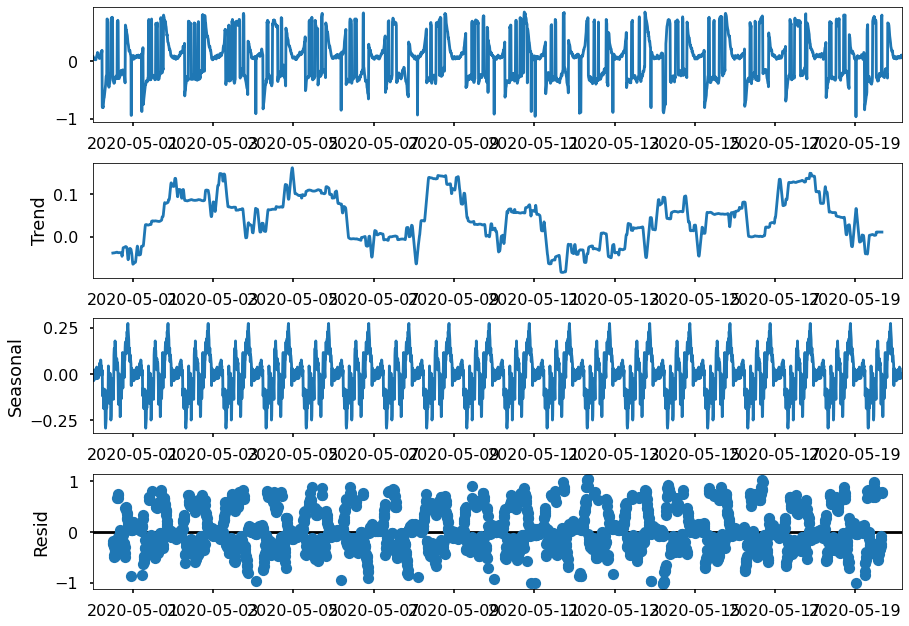

In [8]:
ax = decomp.plot()
plt.show()

In [9]:
adfuller(newinfant[en-10000 : en])

(-29.031380615897557,
 0.0,
 9,
 9990,
 {'1%': -3.4310047528604803,
  '5%': -2.861829361784287,
  '10%': -2.5669240221402583},
 1749.077381656909)

/Users/olegdubinkin/Documents/Python/PyCharm/BabySleep/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


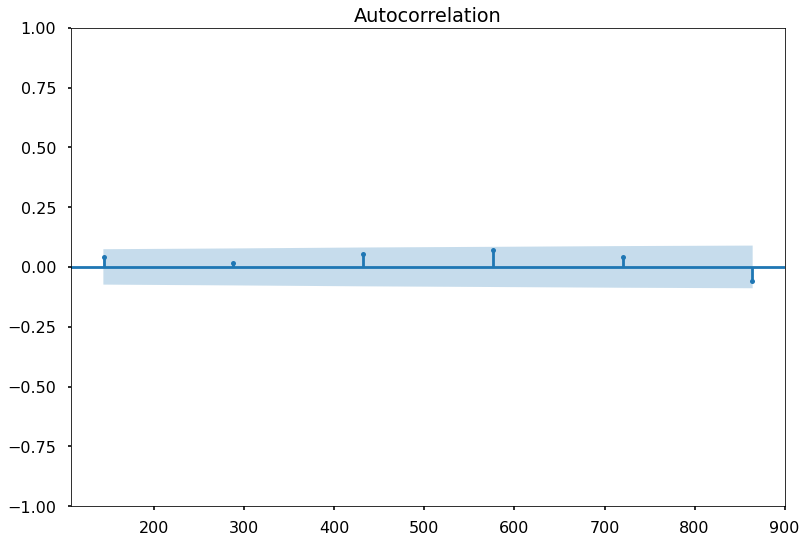

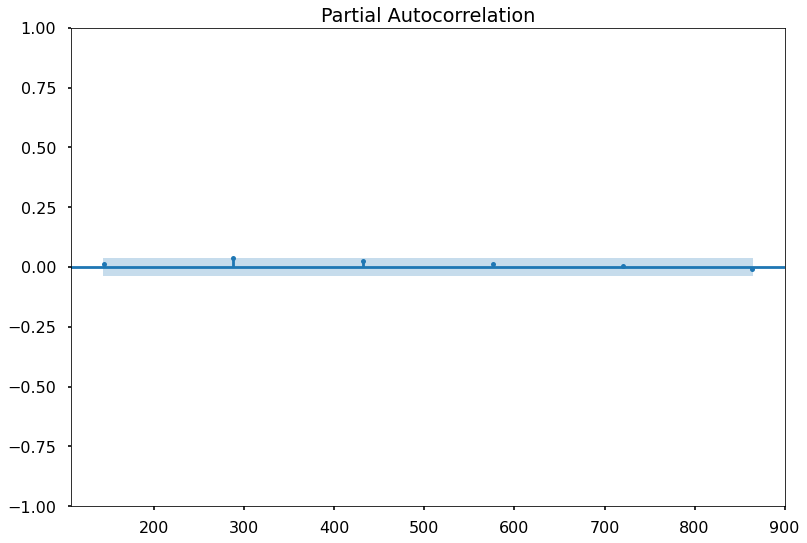

In [10]:
laglist = [144, 2*144, 3*144, 4*144, 5*144, 6*144]
plot_acf(pd.Series(newinfant)[st : en], lags = laglist, zero = False);
plot_pacf(pd.Series(newinfant)[st : en], lags = laglist, zero = False);

In [11]:
st = 120 * 24 * 6
en = (120 + 10) * 24 * 6 + 6 * 4
newinfant[st:en]

2020-04-30 00:00:00    0.068182
2020-04-30 00:10:00    0.083333
2020-04-30 00:20:00    0.068182
2020-04-30 00:30:00    0.060606
2020-04-30 00:40:00    0.045455
                         ...   
2020-05-10 03:10:00    0.060606
2020-05-10 03:20:00    0.053030
2020-05-10 03:30:00    0.083333
2020-05-10 03:40:00    0.068182
2020-05-10 03:50:00    0.053030
Freq: 10T, Length: 1464, dtype: float64

In [12]:
st = 120 * 24 * 6
en = (120 + 10) * 24 * 6 + 6 * 4
mod = SARIMAX(newinfant[st:en], 
              order=(10, 0, 0),
              seasonal_order = (0, 0, 0, 144))
res = mod.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.46701D-03    |proj g|=  2.82308D-02

At iterate    5    f= -3.47878D-03    |proj g|=  1.58118D-03

At iterate   10    f= -3.47903D-03    |proj g|=  9.24888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     12     15      1     0     0   2.046D-05  -3.479D-03
  F =  -3.4790403406636927E-003

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [13]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1464
Model:              SARIMAX(10, 0, 0)   Log Likelihood                   5.093
Date:                Mon, 21 Mar 2022   AIC                             11.813
Time:                        17:43:12   BIC                             69.992
Sample:                    04-30-2020   HQIC                            33.513
                         - 05-10-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7451      0.025     29.982      0.000       0.696       0.794
ar.L2          0.0679      0.039      1.749      0.080      -0.008       0.144
ar.L3         -0.0780      0.041     -1.891      0.059      -0.159       0.003
ar.L4          0.0113      0.034      0.334      0.738      -0.055       0.077
ar.L5          0.0102      0.037      0.280      0.779      -0.061       0.082
ar.L6         -0.0010      0.045     -0.022      0.982      -0.089       0.087
ar.L7         -0.0386      0.049     -0.796      0.426      -0.134       0.057
ar.L8          0.0044      0.048      0.092      0.927      -0.090       0.099
ar.L9          0.0230      0.052      0.441      0.659      -0.079       0.125
ar.L10        -0.0602      0.038     -1.599      0.110      -0.134       0.014
sigma2         0.0581      0.002     36.347      0.000       0.055       0.061
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              4315.53
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.02
Prob(H) (two-sided):                  0.21   Kurtosis:                        11.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
res.save('saved_models/SARIMAX.pkl')

In [24]:
res1 = SARIMAXResults.load('saved_models/SARIMAX.pkl')

In [25]:
forecast = res1.get_forecast(steps = 288)
prediction = pd.Series(forecast.predicted_mean)
conf_int = forecast.conf_int()

<AxesSubplot:>

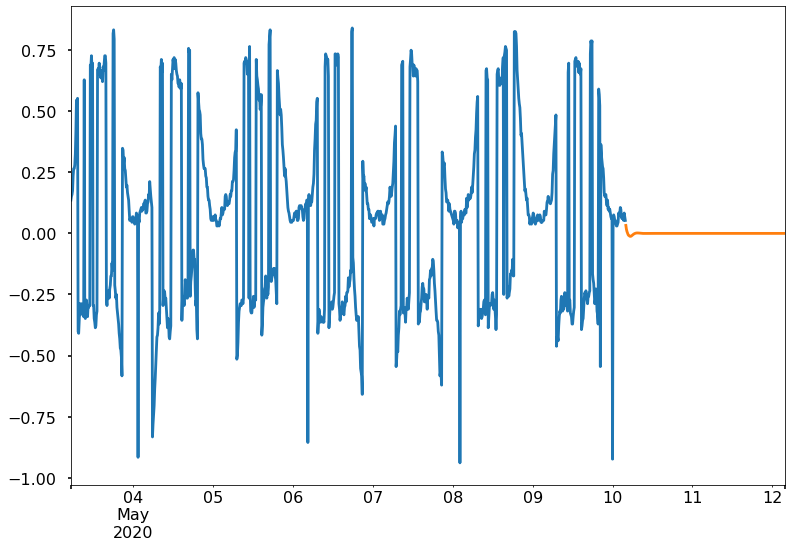

In [26]:
ax = newinfant[en - 1000 : en].plot()

prediction.plot(ax=ax, label = 'Forecasts')

#ax.fill_between()

<AxesSubplot:>

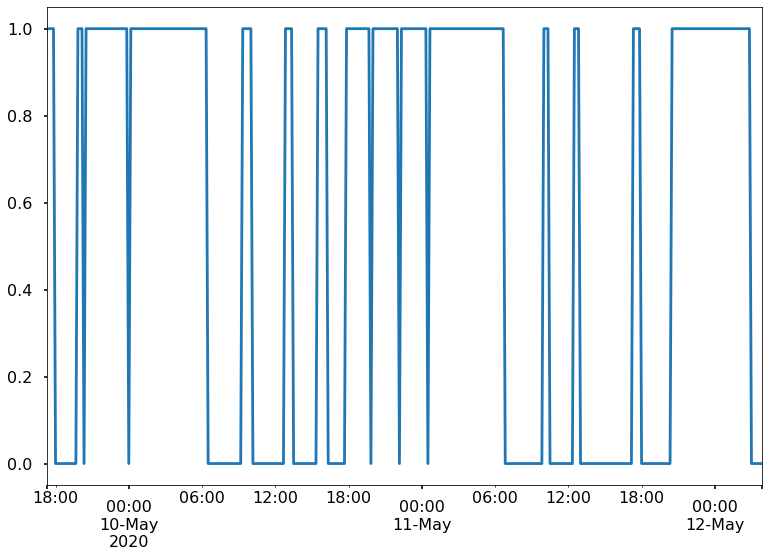

In [23]:
(newinfant + trend)[en-64:en+288].plot()

<AxesSubplot:>

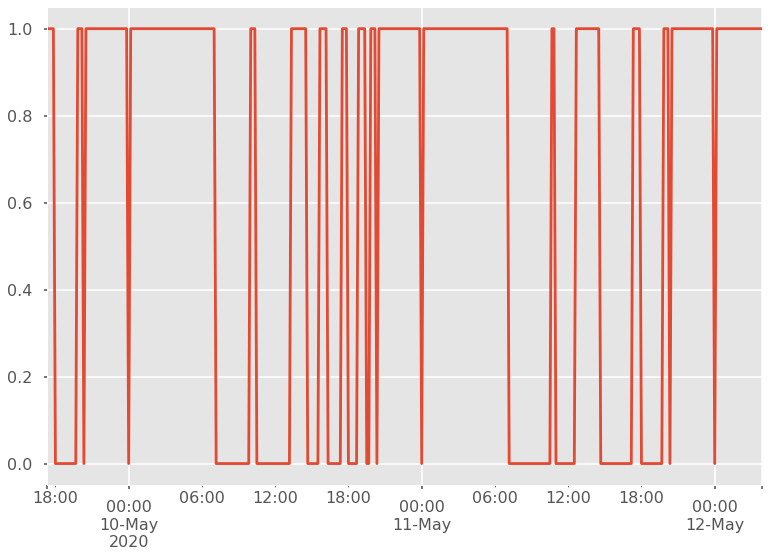

In [246]:
finalpredict = pd.concat([newinfant[en-64:en],prediction])+trend[en-64:en+288]
finalpredict.round().plot()

In [274]:
order_aic_bic=[]

for p in range(1,4):
    for q in range(3):
        for ps in range(1,4):
            for qs in range(3):
                mod = SARIMAX(newinfant[st:en], 
                              order=(8 + p, 0, q),
                              seasonal_order = (ps, 1, qs, 144))
                res = mod.fit()
                order_aic_bic.append((p, q, ps, qs, res.aic, res.bic))

order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'ps', 'qs', 'AIC', 'BIC'])

print(order_df.sort_values('AIC'))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: Convergenc

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q  ps  qs         AIC         BIC
31  2  0   2   1  290.113987  362.709405
58  3  0   2   1  291.492253  369.273059
34  2  0   3   1  291.722916  369.503721
40  2  1   2   1  291.837612  369.618417
32  2  0   2   2  291.896767  369.677572
49  2  2   2   1  291.972061  374.938253
67  3  1   2   1  292.639710  375.605902
61  3  0   3   1  293.063945  376.030137
13  1  1   2   1  293.182339  365.777757
43  2  1   3   1  293.431679  376.397872
76  3  2   2   1  293.474738  381.626317
59  3  0   2   2  293.484898  376.451090
52  2  2   3   1  293.863719  382.015298
35  2  0   3   2  293.897220  376.863413
70  3  1   3   1  294.191878  382.343458
4   1  0   2   1  294.412956  361.822987
28  2  0   1   1  294.712525  362.122556
16  1  1   3   1  294.842147  372.622953
79  3  2   3   1  295.004742  388.341709
62  3  0   3   2  295.260574  383.412154
44  2  1   3   2  295.613034  383.764613
53  2  2   3   2  295.865116  389.202082
55  3  0   1   1  296.117692  368.713110
7   1  0   3   1

In [275]:
order_df.sort_values('AIC').to_csv('SARIMAX_model_selection_p=8+p_d=0_ds=1_s=144.csv')